# Marvel vs DC: Exploratory Data Analysis (EDA)


### Introducción
Este notebook analiza los datos de las franquicias de Marvel y DC para identificar patrones y realizar comparaciones clave. El objetivo es entender cómo diferentes factores influyen en el éxito de sus películas y series.

### Contexto
Las franquicias de Marvel y DC son dos de las más grandes en la industria del entretenimiento. Este análisis busca responder preguntas como:
- ¿Cuál de las dos tiene mejores calificaciones promedio?
- ¿Cómo varían los géneros entre Marvel y DC?

### Hipótesis
1. Las películas de Marvel tienen una puntuación promedio en IMDb mayor que las de DC.
2. Los géneros más populares son consistentes entre ambas franquicias.

#### 1. Importación de Librerías

In [2]:
import bs4 as bs
import urllib.request
import pandas as pd
import numpy as np
import seaborn as sns
import re
from pandas import DataFrame
import matplotlib.pyplot as plt
# from nltk import flatten
sns.set()
%matplotlib inline

In [3]:
# Configuraciones de visualización
sns.set(style="whitegrid")
plt.rcParams['figure.figsize'] = (10, 6)

####  2. Extracción de datos para la lista de películas de acción real basadas en publicaciones de Marvel Comics

In [4]:
sauce1 = urllib.request.urlopen("https://en.wikipedia.org/wiki/List_of_films_based_on_Marvel_Comics_publications")
soup1 = bs.BeautifulSoup(sauce1, 'lxml')

Extracción de los nombres de las columnas

In [6]:
table1 = soup1.find('table')
tbody1 = table1.select("tbody")
th1 = table1.select("th")
column_names1 = [str(c.string).strip() for c in th1]
column_names1

['Year', 'Title', 'Production studio(s)', 'Notes', 'Upcoming']

Extracción de datos de filas

In [8]:
# Encontrar todas las filas de la tabla y excluir las innecesarias
table_rows1 = table1.find_all('tr')[1:61]

# Manteniéndolos en una lista con todos los datos de la tabla
row_list1 = []
for tr1 in table_rows1:
    td1 = tr1.find_all('td')
    row1 = [str(i1.get_text()).strip() for i1 in td1]

    # Intentando encontrar valores de Año en cadenas y convertirlos a números enteros
    if len(row1) > 0 and len(row1[0]) == 4:
        try:
            row1[0] = int(row1[0])
        except:
            continue
    row_list1.append(row1)

# Se corrige el intervalo de filas obtenido de HTML. También se limpian y reemplazan las filas con los valores adecuados
row_list_marvel = []
for b1 in row_list1:
    if isinstance(b1[0], str) and len(b1) == 3:
        b1.insert(0, '')
    if isinstance(b1[0], str) and len(b1) == 2:
        b1.insert(0, '')
        b1.insert(1, '')
    if len(b1) > 1 and b1[1] == '':
        try:
            b1[1] = b1[2]
            b1[2] = ""
        except:
            continue
    if len(b1) == 3:
        b1.append('None')
    row_list_marvel.append(b1)

Limpieza y Preprocesamiento

In [13]:
# Convertir la lista en un marco de datos
df1 = pd.DataFrame(row_list_marvel, columns=column_names1[:4])

# Reemplazar nuevos valores faltantes con NaN
df1['Year'] = df1['Year'].replace('', np.nan)

# Rellenar los valores NaN con los datos de la fila anterior (¡corregir nuevamente los datos del problema de rowspan!)
df1['Year'] = df1['Year'].fillna(method='ffill')

# Filtrar solo los valores numéricos en la columna 'Year'
df1 = df1[pd.to_numeric(df1['Year'], errors='coerce').notnull()]

# Conversión de todos los valores de Año a números enteros que se convirtieron en flotantes en el proceso
df1['Year'] = df1['Year'].astype(float).astype(int)

# Cambiar algunas filas de Production Studio(s) con las filas Ninguna de Notas que aparecieron en las Notas después de cambiar las filas a la derecha para corregir el problema de extensión de filas
wrongDataIdx1 = (df1['Notes'] == 'None')
df1.loc[wrongDataIdx1, ['Production studio(s)', 'Notes']] = df1.loc[wrongDataIdx1, ['Notes', 'Production studio(s)']].values

# Rellenar None con valores NaN y luego con los valores apropiados
df1['Production studio(s)'] = df1['Production studio(s)'].replace('None', np.nan)
df1['Production studio(s)'] = df1['Production studio(s)'].replace("", np.nan)
df1['Production studio(s)'] = df1['Production studio(s)'].fillna(method='ffill')

C:\Users\Anna\AppData\Local\Temp\ipykernel_1640\1977526810.py:8: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df1['Year'] = df1['Year'].fillna(method='ffill')
C:\Users\Anna\AppData\Local\Temp\ipykernel_1640\1977526810.py:23: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df1['Production studio(s)'] = df1['Production studio(s)'].fillna(method='ffill')


In [14]:
df1.head()

,Year,Title,Production studio(s),Notes
0,1986,Howard the Duck,Universal Pictures,Co-produced by Lucasfilm
1,1998,Blade,New Line Cinema,
2,2000,X-Men,New Line Cinema,20th Century Fox
3,2002,Blade II,New Line Cinema,New Line Cinema
4,2002,Spider-Man,Columbia Pictures,Nominated for 2 Oscars


#### 3. Recopilación de datos para la lista de películas de acción real basadas en publicaciones de DC Comics

In [15]:

sauce2 = urllib.request.urlopen("https://en.wikipedia.org/wiki/List_of_films_based_on_DC_Comics_publications")
soup2 = bs.BeautifulSoup(sauce2, 'lxml')

Extracción de los nombres de las columnas

In [16]:
table2 = soup2.find('table')
tbody2 = table2.select("tbody")
th2 = table2.select("th")
column_names2 = [str(c.string).strip() for c in th2]
column_names2

['Year', 'Title', 'Production studio(s)', 'Notes', 'Upcoming']

Extracción de datos de filas

In [21]:
# Encontrar todas las filas de la tabla y excluir las innecesarias
table_rows2 = table2.find_all('tr')[1:35]

# Manteniéndolos en una lista con todos los datos de la tabla
row_list2 = []
for tr2 in table_rows2:
  td2 = tr2.find_all('td')

# Intentando encontrar valores de Año en cadenas y convertirlos a números enteros
  row2 = [str(i2.get_text()).strip() for i2 in td2]
  if len(row2[0])==4:
    try:
      row2[0]=int(row2[0])
    except:
      continue
  row_list2.append(row2)

# Se corrige el intervalo de filas obtenido de HTML. También se limpian y reemplazan las filas con los valores adecuados
row_list_dc = []
for b2 in row_list2:
  if isinstance(b2[0], str) and len(b2)==3:
    b2.insert(0, '')
  if isinstance(b2[0], str) and len(b2)==2:
    b2.insert(0, '')
    b2.insert(1, '')
  if b2[1]=='':
    try:
      b2[1]=b2[2]
      b2[2]=""
    except:
      continue
  if len(b2)==3:
    b2.append('None')
  else:
    b2
  row_list_dc.append(b2)

Limpieza y Preprocesamiento

In [73]:
# Convertir la lista en un marco de datos
df2 = pd.DataFrame(row_list_dc, columns=column_names2[:4])

# Reemplazar nuevos valores faltantes con NaN usando infer_objects para mantener el comportamiento esperado
df2['Year'] = df2['Year'].replace('', np.nan).infer_objects(copy=False)

# Rellenar los valores NaN con los datos de la fila anterior
df2['Year'] = df2['Year'].ffill()

# Convertir todos los valores de Año a números enteros que se convirtieron en flotantes en el proceso
df2['Year'] = df2['Year'].astype(float).astype(int)

# Corregir las filas donde "Production Studio(s)" y "Notes" están intercambiadas
wrongDataIdx2 = (df2['Notes'] == 'None')
df2.loc[wrongDataIdx2, ['Production studio(s)', 'Notes']] = df2.loc[wrongDataIdx2, ['Notes', 'Production studio(s)']].values

# Rellenar "None" y valores vacíos con NaN, luego usar el método de propagación hacia adelante
df2['Production studio(s)'] = df2['Production studio(s)'].replace(['None', ''], np.nan)
df2['Production studio(s)'] = df2['Production studio(s)'].ffill()

C:\Users\Anna\AppData\Local\Temp\ipykernel_1640\2037758334.py:5: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df2['Year'] = df2['Year'].replace('', np.nan).infer_objects(copy=False)


In [74]:
df2.head()

,Year,Title,Production studio(s),Notes
0,1951,Superman and the Mole Men,Lippert Pictures,First feature film based on a DC Comics charac...
1,1966,Batman,20th Century Fox/Greenlawn Productions,Related to the 1960s Batman television series.
2,1978,Superman,Dovemead Film Export A.G./International Film P...,"Won 1 Special Oscar, nominated for 3 more."
3,1980,Superman II,Dovemead Film Export A.G./International Film P...,Director's cut titled Superman II: The Richard...
4,1982,Swamp Thing,Embassy Pictures,


#### 4. Fusionar dos dataframes en uno y agregar una columna que contenga el nombre (abreviado) del cómic

In [37]:
mc=df1
mc['Comics'] = 'MC'

dc=df2
dc['Comics'] = 'DC'

In [52]:
mcdc = pd.concat([mc, dc], ignore_index=True).sort_values('Year', ascending=True).reset_index(drop=True)
mcdc.head(10)

,Year,Title,Production studio(s),Notes,Comics
0,1951,Superman and the Mole Men,Lippert Pictures,First feature film based on a DC Comics charac...,DC
1,1966,Batman,20th Century Fox/Greenlawn Productions,Related to the 1960s Batman television series.,DC
2,1978,Superman,Dovemead Film Export A.G./International Film P...,"Won 1 Special Oscar, nominated for 3 more.",DC
3,1980,Superman II,Dovemead Film Export A.G./International Film P...,Director's cut titled Superman II: The Richard...,DC
4,1982,Swamp Thing,Embassy Pictures,,DC
5,1983,Superman III,Embassy Pictures,Cantharus Productions N.V./Dovemead Films,DC
6,1984,Supergirl,Artistry Ltd/Cantharus Productions/Pueblo Film...,Spin-off to the 1978 Superman film.,DC
7,1986,Howard the Duck,Universal Pictures,Co-produced by Lucasfilm,MC
8,1987,Superman IV: The Quest for Peace,Golan-Globus/Cannon Films,,DC
9,1989,The Return of Swamp Thing,Golan-Globus/Cannon Films,Lightyear Entertainment,DC


#### 5. Se muestra el número total de películas de acción real producidas por año que se basan en Marvel Comics y DC Comics hasta 2020

In [53]:
count = mcdc[["Year", "Comics"]]
count_merge = count.value_counts()

Text(0.5, 0.98, '\n Count of all Marvel (green) and DC (purple) Live Action Films produced per year')

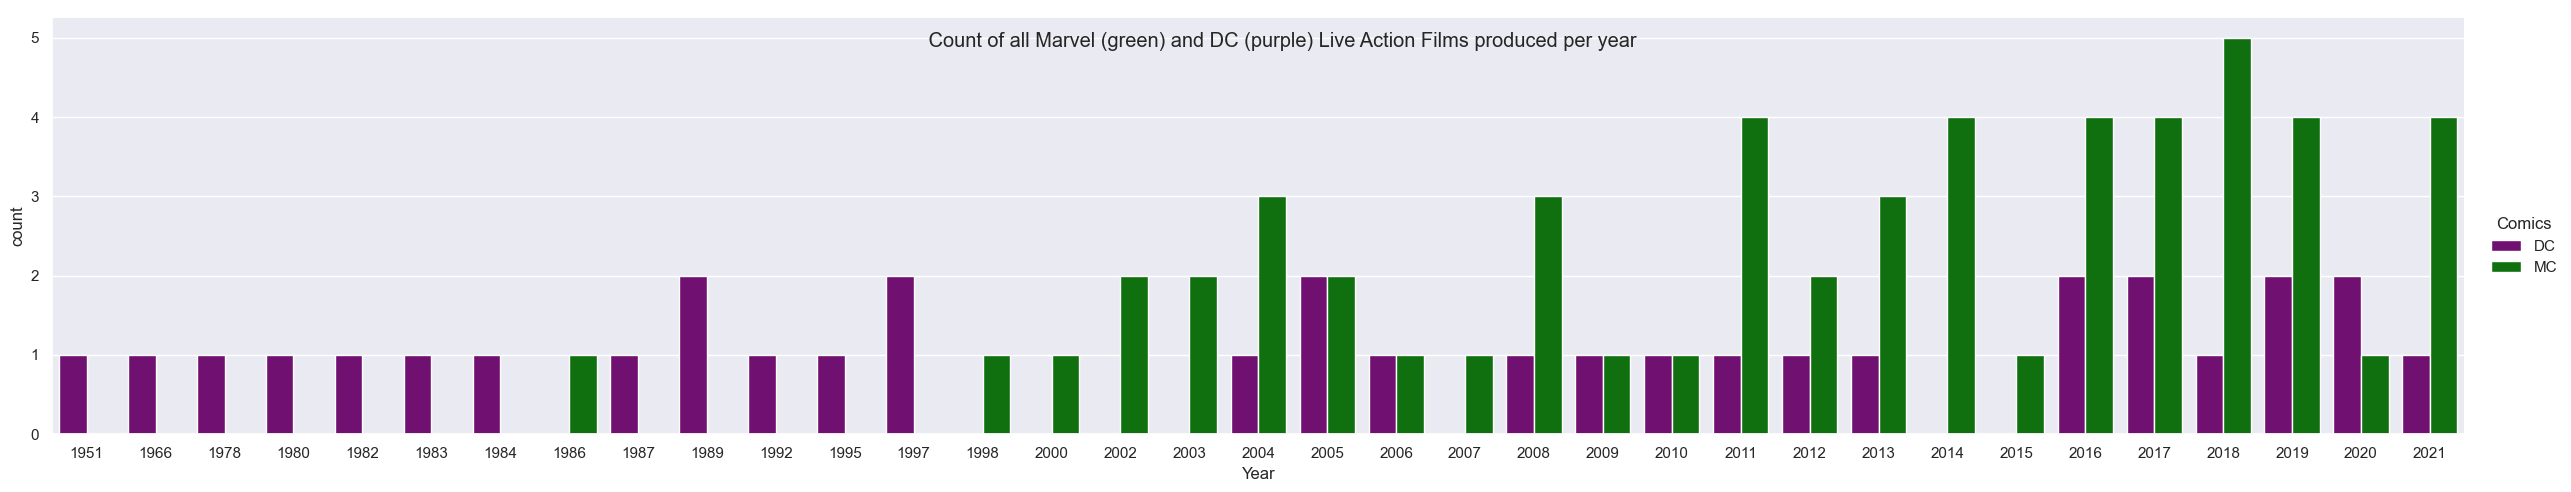

In [60]:
df_both = pd.DataFrame(count_merge).reset_index()
df_both = df_both.rename(columns = {0: "count"})
df_both = df_both.sort_values('Year', ascending=False)

sns.set_theme(style="darkgrid")
ax = sns.catplot(data=df_both, kind="bar", x="Year", hue = 'Comics', y='count', height=5, aspect=5, palette=sns.color_palette(['purple', 'green']))
ax.fig.suptitle('\n Count of all Marvel (green) and DC (purple) Live Action Films produced per year')


#### 6. Se muestra el número total de películas de acción real producidas hasta 2020

In [61]:
both_sum = df_both[["Comics", 'count']]
both_sum= both_sum.groupby('Comics')['count'].sum()
both = pd.DataFrame(both_sum).reset_index()
both = both.rename(columns = {"count": "Count of Total Live Action Films"})
both

,Comics,Count of Total Live Action Films
0,DC,34
1,MC,55


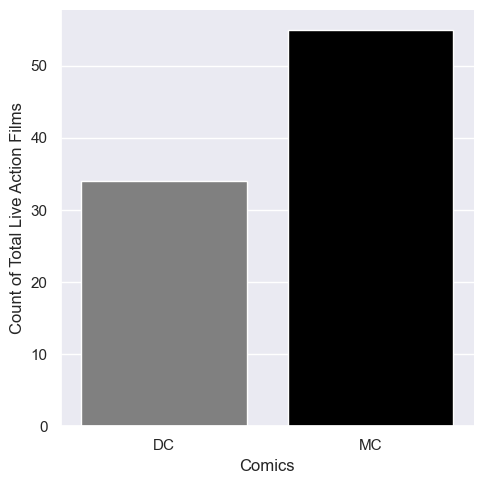

In [63]:
sns.set_theme(style="darkgrid")
ax = sns.catplot(data=both, kind="bar", x="Comics", hue = 'Comics' , y='Count of Total Live Action Films', palette=sns.color_palette(['grey', 'black']))

#### 7. Se muestra la tabla que contiene el recuento de nominaciones al Oscar

In [87]:
# Mostrar filas que contienen la cadena "Oscar" en la columna Notas
mcdc_o = mcdc[mcdc['Notes'].str.contains(r"Oscar", na=False)]
mcdc_o.head()

,Year,Title,Production studio(s),Notes,Comics,Franchise
2,1978,Superman,Dovemead Film Export A.G./International Film P...,"Won 1 Special Oscar, nominated for 3 more.",DC,DC
10,1989,Batman,Warner Bros./PolyGram Filmed Entertainment,Won 1 Oscar.,DC,DC
11,1992,Batman Returns,Warner Bros./PolyGram Filmed Entertainment,Nominated for 2 Oscars.,DC,DC
12,1995,Batman Forever,Warner Bros./PolyGram Filmed Entertainment,Nominated for 3 Oscars.,DC,DC
17,2002,Spider-Man,Columbia Pictures,Nominated for 2 Oscars,MC,DC


In [88]:
# #Dividir cadenas, reorganizar filas
oscar = mcdc_o[["Notes", "Comics"]]

ex = oscar.set_index(["Comics"]).apply(lambda col: col.str.split(',').explode()).reset_index().reindex(oscar.columns, axis=1)
ex['Notes'] = ex['Notes'].str.lstrip(" ")

ex = ex.set_index(["Comics"]).apply(lambda col: col.str.split(';').explode()).reset_index().reindex(ex.columns, axis=1)
ex['Notes'] = ex['Notes'].str.lstrip(" ")

ex = ex.set_index(["Comics"]).apply(lambda col: col.str.split('.').explode()).reset_index().reindex(ex.columns, axis=1)
ex['Notes'] = ex['Notes'].str.lstrip(" ")
# ex

exo = ex[ex['Notes'].str.contains("(N|n)ominated|Won")]

C:\Users\Anna\AppData\Local\Temp\ipykernel_1640\514856859.py:14: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  exo = ex[ex['Notes'].str.contains("(N|n)ominated|Won")]


In [89]:
# Encontrar números enteros en las cadenas y almacenarlos en una nueva columna
lst = []
for i in exo.index:
  try:
    x = re.findall('\d+', exo['Notes'][i])
    x=int(x[0])
    lst.append(x)
  except:
    lst.append(1)

exo['Nomination Count'] = lst


<>:5: SyntaxWarning: invalid escape sequence '\d'
<>:5: SyntaxWarning: invalid escape sequence '\d'
C:\Users\Anna\AppData\Local\Temp\ipykernel_1640\3975897149.py:5: SyntaxWarning: invalid escape sequence '\d'
  x = re.findall('\d+', exo['Notes'][i])
C:\Users\Anna\AppData\Local\Temp\ipykernel_1640\3975897149.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  exo['Nomination Count'] = lst


In [90]:
exo.head()

,Notes,Comics,Nomination Count
0,Won 1 Special Oscar,DC,1
1,nominated for 3 more,DC,3
3,Won 1 Oscar,DC,1
5,Nominated for 2 Oscars,DC,2
7,Nominated for 3 Oscars,DC,3


#### 8. Dando una idea de qué películas basadas en publicaciones de cómics obtuvieron más nominaciones a los Oscar que otras.

Cómo encontrar el recuento total de nominaciones para DC y MC

In [92]:
exo_nom = exo[["Comics", 'Nomination Count']]
exo_nom_cat= exo_nom.groupby("Comics")['Nomination Count'].sum()
exo_nom_cat

Comics
DC    32
MC    27
Name: Nomination Count, dtype: int64

Encontrar el número total de películas basadas en DC y MC que obtuvieron nominaciones

In [94]:
nomcount = pd.DataFrame(exo_nom_cat).reset_index()
nomcount = nomcount.rename(columns = {'Nomination Count': "Total Oscar Nomination Count"})
m_oscar = oscar["Comics"].value_counts()
m_oscar

Comics
MC    16
DC     9
Name: count, dtype: int64

  Count of Live Action Films for Oscar Nomination  count
0                                              MC     16
1                                              DC      9


ValueError: Could not interpret value `Comics` for `x`. An entry with this name does not appear in `data`.

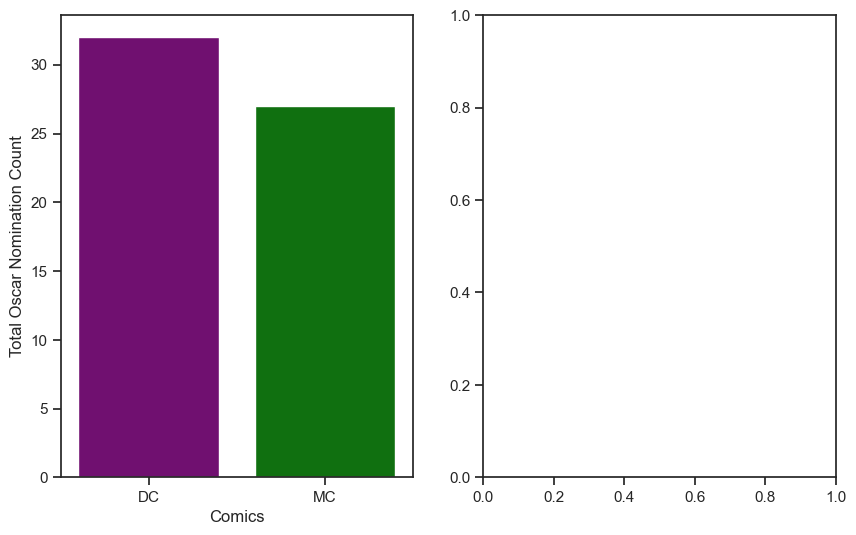

In [102]:
# Verifica las columnas de moviecount después del renombramiento
moviecount = pd.DataFrame(m_oscar).reset_index()
moviecount = moviecount.rename(columns={'index': "Comics", "Comics": "Count of Live Action Films for Oscar Nomination"})

# Verifica las primeras filas del DataFrame para asegurar que la columna 'Comics' existe
print(moviecount.head())

# Establece la paleta correctamente y asigna 'hue' para evitar la advertencia
sns.set(style="ticks")
fig, axs = plt.subplots(1, 2)

# Revisar la columna 'Comics' antes de usarla en el gráfico
sns.barplot(data=nomcount, x="Comics", y='Total Oscar Nomination Count', hue="Comics", ax=axs[0], palette=sns.color_palette(['purple', 'green']))
sns.barplot(data=moviecount, x="Comics", y="Count of Live Action Films for Oscar Nomination", hue="Comics", ax=axs[1], palette=sns.color_palette(['green', 'purple']))

fig.tight_layout()
plt.show()

Curiosamente, 9 películas de acción real de DC tuvieron 32 nominaciones a los Oscar y 15 películas de acción real de Marvel Comics (más que DC) tuvieron en total 26 nominaciones (menos que DC).

En la siguiente sección, veamos qué película(s) de acción de DC son responsables de superar la cantidad de nominaciones al Oscar de Marvel al obtener 32-26 = 6 nominaciones más.

#### 9. Encontrar la(s) película(s) de acción real basadas en los cómics que son responsables de superar a las demás en el recuento de nominaciones

Dado que DC tiene más nominaciones que Marvel, traigamos todas las películas de DC que obtuvieron nominaciones y contemos sus nominaciones totales individualmente.

In [103]:
tncat_o = mcdc_o[["Year","Title", "Notes", "Comics"]]
max_dc = tncat_o.loc[tncat_o["Comics"] == 'DC']
max_dc

,Year,Title,Notes,Comics
2,1978,Superman,"Won 1 Special Oscar, nominated for 3 more.",DC
10,1989,Batman,Won 1 Oscar.,DC
11,1992,Batman Returns,Nominated for 2 Oscars.,DC
12,1995,Batman Forever,Nominated for 3 Oscars.,DC
26,2005,Batman Begins,Reboot; nominated for 1 Oscar.,DC
30,2006,Superman Returns,Alternate trilogy conclusion only to Superman ...,DC
34,2008,The Dark Knight,"Won 2 Oscars, nominated for 6 more.",DC
62,2016,Suicide Squad,Set in the DCEU. Won 1 Oscar.,DC
80,2019,Joker,"Won 2 Oscars, nominated for 9 more.",DC


In [118]:
import re
from nltk import flatten

# Inicializamos una lista para almacenar los resultados
pst = []

# Recorremos el índice de max_dc para extraer las nominaciones
for p in max_dc.index:
    # Extraemos los números (nominaciones) de la columna 'Notes'
    x = re.findall('\d+', max_dc['Notes'][p])
    pst.append(x)

# Procesamos la lista para asegurarnos de que los valores sean enteros y sumamos los casos con dos valores
for h in pst:
    if len(h) == 0:
        h.append(1)  # Si no hay valores, añadimos 1 como valor por defecto
    elif len(h) == 2:
        h[0] = int(h[0])
        h[1] = int(h[1])
    elif len(h) == 1:
        h[0] = int(h[0])

# Sumamos los dos valores cuando hay dos números en la lista
for q in range(len(pst)):
    if len(pst[q]) == 2:
        pst[q] = [pst[q][0] + pst[q][1]]

# Aplanamos la lista de listas en una sola lista
flattened_list = [item for sublist in pst for item in sublist]

# Imprimimos la lista final
print(flattened_list)

[4, 1, 2, 3, 1, 1, 8, 1, 11]


<>:10: SyntaxWarning: invalid escape sequence '\d'
<>:10: SyntaxWarning: invalid escape sequence '\d'
C:\Users\Anna\AppData\Local\Temp\ipykernel_1640\4261698638.py:10: SyntaxWarning: invalid escape sequence '\d'
  x = re.findall('\d+', max_dc['Notes'][p])


In [108]:
max_dc['Nomination Count'] = flattened_list
max_dc

C:\Users\Anna\AppData\Local\Temp\ipykernel_1640\2674035892.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  max_dc['Nomination Count'] = flattened_list


,Year,Title,Notes,Comics,Nomination Count
2,1978,Superman,"Won 1 Special Oscar, nominated for 3 more.",DC,4
10,1989,Batman,Won 1 Oscar.,DC,1
11,1992,Batman Returns,Nominated for 2 Oscars.,DC,2
12,1995,Batman Forever,Nominated for 3 Oscars.,DC,3
26,2005,Batman Begins,Reboot; nominated for 1 Oscar.,DC,1
30,2006,Superman Returns,Alternate trilogy conclusion only to Superman ...,DC,1
34,2008,The Dark Knight,"Won 2 Oscars, nominated for 6 more.",DC,8
62,2016,Suicide Squad,Set in the DCEU. Won 1 Oscar.,DC,1
80,2019,Joker,"Won 2 Oscars, nominated for 9 more.",DC,11


In [110]:
max_dc1 = max_dc[max_dc['Nomination Count']==max_dc['Nomination Count'].max()]
max_dc1

,Year,Title,Notes,Comics,Nomination Count
80,2019,Joker,"Won 2 Oscars, nominated for 9 more.",DC,11


Así, en 2019, la película "Joker" realmente elevó el recuento general de nominaciones de DC, superando a Marvel.

Pero, ¿qué publicación ganó más premios Oscar? ¿Marvel Comics o DC Comics?

Averigüémoslo en la siguiente sección.

#### 10. Encontrar qué publicación tiene el mayor número de ganadores de los Oscar según películas de acción real

In [111]:
won_o = exo[exo['Notes'].str.contains(r"(W|w)on", na=False)]
won_o

C:\Users\Anna\AppData\Local\Temp\ipykernel_1640\2399996104.py:1: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  won_o = exo[exo['Notes'].str.contains(r"(W|w)on", na=False)]


,Notes,Comics,Nomination Count
0,Won 1 Special Oscar,DC,1
3,Won 1 Oscar,DC,1
10,Won 1 Oscar,MC,1
18,Won 2 Oscars,DC,2
33,Won 1 Oscar,DC,1
38,Won 3 Oscars,MC,3
41,Won 2 Oscars,DC,2


In [113]:
win_count = won_o.groupby("Comics")['Nomination Count'].sum()
win_count

Comics
DC    7
MC    4
Name: Nomination Count, dtype: int64

¡DC Films superó a Marvel Films y ganó los Oscar!

#### CONCLUSIÓN

El objetivo de extraer datos, limpiarlos y analizarlos se había cumplido. Fue un tema muy interesante con el que trabajar. La codificación se centró principalmente en corregir y reorganizar las filas y requirió muchos cálculos.

Descubrí que la mayoría de las películas basadas en Marvel obtuvieron nominaciones que las películas basadas en DC. ¡Pero las películas de DC obtuvieron nominaciones en más categorías que Marvel y también superaron a Marvel al ganar más premios Oscar!

Sin embargo, ya sea del Universo de DC o del Universo Cinematográfico de Marvel, ¡me gusta ver todas sus películas!